In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer



# SGD One class SVM

## BGL

In [60]:
BGL_train= pd.read_csv("data/log_params/BGL_all_params.csv")


In [61]:
BGL_train.columns

Index(['Unnamed: 0', 'timestamp', 'text', 'label', 'filename', 'clusters',
       'tfidf_text', 'p-0-0', 'p-2-0', 'p-3-0', 'p-3-1', 'p-3-2', 'p-3-3',
       'p-3-4', 'p-3-5', 'p-3-6', 'p-3-7', 'p-3-8', 'p-3-9', 'p-3-10',
       'p-3-11', 'p-3-12', 'p-3-13', 'p-3-14', 'p-3-15', 'p-3-16', 'p-3-17',
       'p-3-18', 'p-3-19', 'p-3-20', 'p-3-21', 'p-3-22', 'p-4-0', 'p-4-1',
       'p-4-2', 'p-4-3', 'p-4-4', 'p-4-5', 'p-4-6', 'p-4-7', 'p-4-8', 'p-7-0',
       'p-7-1', 'p-7-2', 'p-7-3', 'p-7-4', 'p-7-5', 'p-8-0', 'p-8-1', 'p-9-0',
       'p-12-0', 'p-12-1', 'p-12-2', 'p-13-0', 'p-14-0', 'p-14-1', 'p-14-2',
       'p-14-3', 'p-14-4', 'p-14-5', 'p-14-6', 'p-14-7', 'p-15-0', 'p-16-0',
       'p-18-0', 'p-18-1', 'p-19-0', 'p-19-1', 'p-19-2', 'p-19-3', 'p-19-4',
       'p-19-5', 'p-21-0', 'p-21-1', 'p-21-2', 'p-21-3', 'p-21-4', 'p-21-5',
       'p-21-6', 'p-21-7', 'p-21-8', 'p-21-9', 'p-25-0'],
      dtype='object')

In [62]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDOneClassSVM

In [63]:
le = LabelEncoder()
y = le.fit_transform(BGL_train['label'])

tfidf = TfidfVectorizer()
vectorized_text = tfidf.fit_transform(BGL_train['tfidf_text'].dropna())



In [64]:
oneclass = SGDOneClassSVM().fit(vectorized_text)


In [65]:
y_pred = oneclass.predict(vectorized_text)
y_pred = [1 if i==-1 else 0 for i in y_pred]


Train Result:
Accuracy Score: 72.68%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999920     0.063398  0.726777      0.531659      0.982550
recall         0.721672     0.996937  0.726777      0.859304      0.726777
f1-score       0.838310     0.119214  0.726777      0.478762      0.824973
support    69109.000000  1306.000000  0.726777  70415.000000  70415.000000
_______________________________________________
Confusion Matrix: 
 [[49874 19235]
 [    4  1302]]

_______________________________________________
Recall Score: 
 0.996937212863706
_______________________________________________
Roc AUC Score: 
 0.8593043875891551


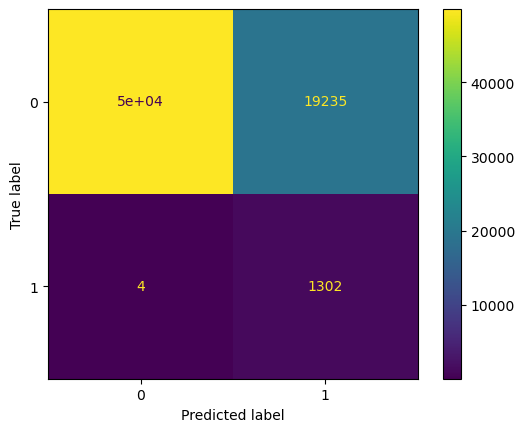

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
oneClass_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
print("Train Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{oneClass_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y, y_pred)}')

oneClass_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()



# Thunderbird

In [68]:
TB_train= pd.read_csv("data/log_params/Thunderbird_all_params.csv")


In [69]:
lle = LabelEncoder()
y = le.fit_transform(TB_train['label'])

tfidf = TfidfVectorizer()
vectorized_text = tfidf.fit_transform(TB_train['tfidf_text'].dropna())





In [70]:

oneclass = SGDOneClassSVM().fit(vectorized_text)



In [71]:
y_pred = oneclass.predict(vectorized_text)
y_pred = [1 if i==-1 else 0 for i in y_pred]

Train Result:
Accuracy Score: 50.56%
_______________________________________________
CLASSIFICATION REPORT:
                       0            1  accuracy      macro avg   weighted avg
precision       0.986720     0.003401  0.505599       0.495060       0.978414
recall          0.508228     0.197015  0.505599       0.352621       0.505599
f1-score        0.670898     0.006687  0.505599       0.338792       0.665287
support    275284.000000  2345.000000  0.505599  277629.000000  277629.000000
_______________________________________________
Confusion Matrix: 
 [[139907 135377]
 [  1883    462]]

_______________________________________________
Recall Score: 
 0.19701492537313434
_______________________________________________
Roc AUC Score: 
 0.3526213959336865


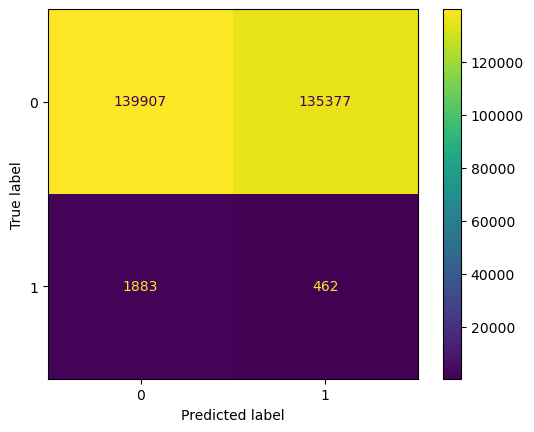

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
oneClass_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
print("Train Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{oneClass_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y, y_pred)}')

oneClass_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()